<a href="https://colab.research.google.com/github/socratesjnr/asuu-strike-project/blob/main/Students_email.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Student Email Generator
This program generates a student emails for Unilag students based on their distribution by faculties levels, and departments.        

In [10]:
import pandas as pd


faculty_conditions = {
                        'faculty': ['Arts', 'Basic Medical Sciences',
                                    'Clincal Sciences', 'Dental Sciences',
                                    'Education', 'Engineering',
                                    'Environmental Sciences', 'Law',
                                    'Management Sciences', 'Pharmacy',
                                    'Science', 'Social Sciences'],
                        'student_count': [3828, 397, 1819, 181, 7046, 3770, 
                                       1466, 1929, 4468, 713, 5868, 3956],
                        'faculty_code': ['01', '09', '07', '10', '03', '04', '05', '06', '02', '12', '08', '11'],
                        'levels': [4, 6, 6, 6, 4, 5, 5, 5, 4, 6, 4, 4]
                        }

department_codes ={
            '01':['01', '02', '03', '04', '05', '06'],
            '02':['01', '02', '03', '04', '05'],
            '03':['01', '02', '03', '04', '05', '06'],
            '04':['01', '02', '03', '04', '05', '06', '07', '08', '09', '10'],
            '05':['01', '02', '03', '04', '05'],
            '06':['01'],
            '07':['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12','13'],
            '08':['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11'],
            '09':['01', '02', '03', '04', '05', '06'],
            '10':['01', '02', '03', '04', '05', '06'],
            '11':['01', '02', '03', '04', '05', '06'],
            '12':['01', '02', '03', '04', '05', '06']
            }


faculty_df = pd.DataFrame(faculty_conditions)
faculty_df['dept_codes'] = faculty_df['faculty_code'].map(
    department_codes)
faculty_df['num_of_dept'] = faculty_df['dept_codes'].apply(lambda x: len(x))
faculty_df['student_per_dept'] = round(faculty_df['student_count'] / faculty_df['num_of_dept'])
faculty_df['student_per_dept_per_level'] = round(
    faculty_df['student_per_dept']/faculty_df['levels'])
faculty_df                                    

,faculty,student_count,faculty_code,levels,dept_codes,num_of_dept,student_per_dept,student_per_dept_per_level
0,Arts,3828,01,4,"[01, 02, 03, 04, 05, 06]",6,638.0,160.0
1,Basic Medical Sciences,397,09,6,"[01, 02, 03, 04, 05, 06]",6,66.0,11.0
2,Clincal Sciences,1819,07,6,"[01, 02, 03, 04, 05, 06, 07, 08, 09, 10, 11, 1...",13,140.0,23.0
3,Dental Sciences,181,10,6,"[01, 02, 03, 04, 05, 06]",6,30.0,5.0
4,Education,7046,03,4,"[01, 02, 03, 04, 05, 06]",6,1174.0,294.0
5,Engineering,3770,04,5,"[01, 02, 03, 04, 05, 06, 07, 08, 09, 10]",10,377.0,75.0
6,Environmental Sciences,1466,05,5,"[01, 02, 03, 04, 05]",5,293.0,59.0
7,Law,1929,06,5,[01],1,1929.0,386.0
8,Management Sciences,4468,02,4,"[01, 02, 03, 04, 05]",5,894.0,224.0
9,Pharmacy,713,12,6,"[01, 02, 03, 04, 05, 06]",6,119.0,20.0


## Generate emails for students based on criteria

Format: "AABBCCXXX@live.unilag.edu.ng".

Where AA=Admission year,
    BB=Faculty code,
    CC=Department code,
    XXX=Student Serial Number


In [11]:
emails = [f"{year}{row['faculty_code']}{dept_code}{id}@live.unilag.edu.ng"
          for index, row in faculty_df.iterrows()
          for dept_code in row['dept_codes']
          for year in range(16, 17 + row['levels'])
          for id in [f'{str(id).zfill(3)}' for id in range(1, int(row['student_per_dept_per_level']) + 1)] + ['501', '502', '503', '504', '505', '506', '507', '508', '509', '510', '511', '512']
          if not (year == 16 and row['levels'] < 5 or year == 20)]
len(emails)

33552

### Test

In [12]:
'170401007@live.unilag.edu.ng' in emails

True

## Classify emails
Create a dataframe housing the emails and their respective faculties

In [13]:
def classify_email(student_email):
    faculty_codes = {
        '01': 'Arts',
        '02': 'Management Sciences',
        '03': 'Education',
        '04': 'Engineering',
        '05': 'Environmental Sciences',
        '06': 'Law',
        '07': 'Clinical Sciences',
        '08': 'Science',
        '09': 'Basic Medical Sciences',
        '10': 'Dental Sciences',
        '11': 'Social Sciences',
        '12': 'Pharmacy'
    }
    faculty_code = student_email[2:4]
    return faculty_codes.get(faculty_code, 'unknown')


Verify whether distriution matches expected

,student_email,faculty
0,170101001@live.unilag.edu.ng,Arts
1,170101002@live.unilag.edu.ng,Arts
2,170101003@live.unilag.edu.ng,Arts
3,170101004@live.unilag.edu.ng,Arts
4,170101005@live.unilag.edu.ng,Arts
...,...,...
33547,191106508@live.unilag.edu.ng,Social Sciences
33548,191106509@live.unilag.edu.ng,Social Sciences
33549,191106510@live.unilag.edu.ng,Social Sciences
33550,191106511@live.unilag.edu.ng,Social Sciences


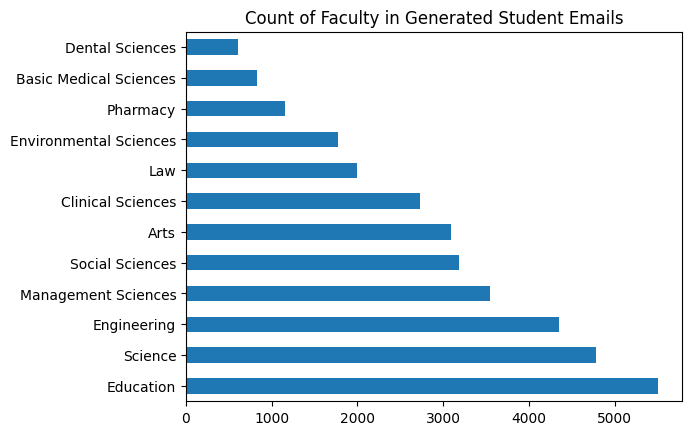

In [14]:
email_df = pd.DataFrame(emails)
email_df.columns = ['student_email']
email_df['faculty'] = email_df['student_email'].apply(classify_email)

email_df['faculty'].value_counts().plot(kind='barh', title='Count of Faculty in Generated Student Emails');
email_df

Remove bounced Emails from CSV

In [15]:
bounced_df = pd.read_csv('bounced_email_addresses.csv')
bounced_df.head()

,Email Address,Faculty,Member Rating,Bounce Type
0,160402065@live.unilag.edu.ng,Engineering,1,hard
1,160402066@live.unilag.edu.ng,Engineering,1,hard
2,160402067@live.unilag.edu.ng,Engineering,1,hard
3,160402068@live.unilag.edu.ng,Engineering,1,hard
4,160402069@live.unilag.edu.ng,Engineering,1,hard


In [16]:
valid_emails = email_df[email_df['student_email'].isin(bounced_df['Email Address'])]
len(valid_emails)

15859

In [17]:
valid_emails

,student_email,faculty
10,170101011@live.unilag.edu.ng,Arts
31,170101032@live.unilag.edu.ng,Arts
63,170101064@live.unilag.edu.ng,Arts
64,170101065@live.unilag.edu.ng,Arts
65,170101066@live.unilag.edu.ng,Arts
...,...,...
33547,191106508@live.unilag.edu.ng,Social Sciences
33548,191106509@live.unilag.edu.ng,Social Sciences
33549,191106510@live.unilag.edu.ng,Social Sciences
33550,191106511@live.unilag.edu.ng,Social Sciences


Create CSV of DataFrame

In [18]:
email_df.to_csv('student_emails.csv', index=False)

In [19]:
valid_emails.to_csv('valid_student_emails.csv', index=False)